## Exploration on Classification on Catergory(Industrybased )

In [107]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator # for word analysis in job title and description
import re
pd.set_option("display.max_colwidth", 100)
pd.set_option('max_columns', 400)
pd.set_option('max_rows', 400)
from nltk.stem.porter import PorterStemmer
# Instantiate Lemmatizer
import nltk
from nltk.stem import WordNetLemmatizer 
# Instantiate PorterStemmer
p_stemmer = PorterStemmer()
from nltk.corpus import stopwords

# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()
import warnings
warnings.filterwarnings('ignore')

In [108]:
df = pd.DataFrame(pd.read_csv('./dataset/data_scientist_us_dataset.csv'))
df.head()

,crawl_timestamp,url,job_title,category,company_name,city,state,country,inferred_city,inferred_state,inferred_country,post_date,job_description,job_type,salary_offered,job_board,geo,cursor,contact_email,contact_phone_number,uniq_id,html_job_description
0,2019-02-06 05:26:22 +0000,https://www.indeed.com/viewjob?jk=fd83355c2b23438c,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Usa,Woodland hills,California,Usa,2019-02-06,Read what people are saying about working here. \n\nWe are Farmers!\n\nJoin a team of diverse pr...,Undefined,NaN,indeed,usa,1549432819114777,NaN,NaN,3b6c6acfcba6135a31c83bd7ea493b18,NaN
1,2019-02-06 05:33:41 +0000,https://www.dice.com/jobs/detail/Data-Scientist-Luxoft-USA-Inc-Middletown-NJ-07748/newageny/802263,Data Scientist,NaN,Luxoft USA Inc,Middletown,NJ,Usa,Middletown,New jersey,Usa,2019-02-05,We have an immediate opening for a Sharp Data Scientist with a strong Mathematical/Statistical b...,Undefined,NaN,dice,usa,1549432819122106,NaN,NaN,741727428839ae7ada852eebef29b0fe,NaN
2,2019-02-06 05:33:35 +0000,https://www.dice.com/jobs/detail/Data-Scientist-Cincinnati-Bell-Technology-Solutions-New-York-NY...,Data Scientist,NaN,Cincinnati Bell Technology Solutions,New York,NY,Usa,New york,New york,Usa,2019-02-05,"Candidates should have the following background, skills and characteristics: Experience develop...",Full Time,NaN,dice,usa,1549432819236156,NaN,NaN,cdc9ef9a1de327ccdc19cc0d07dbbb37,NaN
3,2019-02-06 05:33:42 +0000,https://www.indeed.com/viewjob?jk=841edd86ead205f2,"Data Scientist, Aladdin Wealth Tech, Associate (Modeler)",Accounting/Finance,BlackRock,New York,NY 10055 (Midtown area),Usa,New york,New york,Usa,2019-02-06,Read what people are saying about working here. \n\nAbout BlackRock\n\nBlackRock helps investors...,Undefined,NaN,indeed,usa,1549432819259473,NaN,NaN,1c8541cd2c2c924f9391c7d3f526f64e,NaN
4,2019-02-06 05:48:23 +0000,https://job-openings.monster.com/senior-data-scientist-charlotte-nc-us-cybercoders/205114316,Senior Data Scientist,biotech,CyberCoders,Charlotte,NC,Usa,Charlotte,North carolina,Usa,2019-02-05,We are seeking an extraordinary Data Scientist in Charlotte to join our fast growing healthcare ...,Full Time,NaN,monster,usa,1549436429015957,NaN,NaN,445652a560a5441060857853cf267470,NaN


In [109]:
df.isnull().sum()

crawl_timestamp             0
url                         0
job_title                   0
category                  882
company_name                1
city                      249
state                     416
country                     0
inferred_city            1020
inferred_state            516
inferred_country          495
post_date                   0
job_description             0
job_type                    0
salary_offered           9403
job_board                 690
geo                       700
cursor                      0
contact_email           10000
contact_phone_number     9584
uniq_id                     0
html_job_description     8401
dtype: int64

In [110]:
for X in ['CyberCoders', 'Jefferson Frank', 'Taboola', 'Nigel Frank International US', 'Social Science Research Solutions', 'The Judge Group', 'Booz Allen Hamilton', 'Robert Half Technology']:
    df.drop(df.loc[df['company_name'] == X].index, inplace=True)
df = df.dropna(subset=['category'])

df = df[['job_title', 'category', 'job_description']]
df.head()

,job_title,category,job_description
0,Enterprise Data Scientist I,Accounting/Finance,Read what people are saying about working here. \n\nWe are Farmers!\n\nJoin a team of diverse pr...
3,"Data Scientist, Aladdin Wealth Tech, Associate (Modeler)",Accounting/Finance,Read what people are saying about working here. \n\nAbout BlackRock\n\nBlackRock helps investors...
5,CIB – Fixed Income Research – Machine Learning Data Scientist - Securitized Products – Associate/VP,Accounting/Finance,Read what people are saying about working here. \n\nOpportunity\n\nThe opportunity is to join ou...
6,"Data Scientist, Licensing Operations",Accounting/Finance,Read what people are saying about working here. \n\nAt Spotify our mission is to provide the wor...
8,"Data Scientist, Aladdin Wealth Tech, Associate",Accounting/Finance,Read what people are saying about working here. \n\nAbout BlackRock\n\nBlackRock helps investors...


In [111]:
df['category'].value_counts()

Computer-or-internet                                                                                           1497
Engineering-or-architecture                                                                                     727
Manufacturing-or-mechanical                                                                                     617
life physical and social science                                                                                581
computer jobs                                                                                                   575
business and financial operations                                                                               481
Computer/Internet                                                                                               442
math jobs                                                                                                       436
Engineering/Architecture                                                

In [112]:
# Merging classes to reduce target

df.loc[df['category']=='Computer-or-internet', 'category'] = 'Computer/Internet'
df.loc[df['category']=='computer jobs', 'category'] = 'Computer/Internet'
df.loc[df['category']=='technology', 'category'] = 'Computer/Internet'

df.loc[df['category'].str.contains('Data Scientist'), 'category'] = 'Data Scientist'


df.loc[df['category']=='Manufacturing-or-mechanical', 'category'] = 'Manufacturing/Mechanical'

df.loc[df['category']=='Engineering-or-architecture', 'category'] = 'Engineering/Architecture'
df.loc[df['category']=='architecture and engineering', 'category'] = 'Engineering/Architecture'

df.loc[df['category']=='administrative jobs', 'category'] = 'Admin/HR/Sale/Customer'
df.loc[df['category']=='Administrative', 'category'] = 'Admin/HR/Sale/Customer'
df.loc[df['category']=='Human-Resources','category'] = 'Admin/HR/Sale/Customer'
df.loc[df['category']=='Customer-Service','category'] = 'Admin/HR/Sale/Customer'
df.loc[df['category']=='Sales', 'category'] = 'Admin/HR/Sale/Customer'

df.loc[df['category']=='life physical and social science', 'category'] = 'Life/Social Science'
df.loc[df['category']=='social science jobs', 'category'] = 'Life/Social Science'

df.loc[df['category']=='Accounting/Finance', 'category'] = 'Accounting/Finance/Insurance/loans'
df.loc[df['category']=='Accounting-or-finance', 'category'] = 'Accounting/Finance/Insurance/loans'
df.loc[df['category']=='business and financial operations', 'category'] = 'Accounting/Finance/Insurance/loans'
df.loc[df['category']=='Insurance', 'category'] = 'Accounting/Finance/Insurance/loans'
df.loc[df['category']=='Banking-or-loans', 'category'] = 'Accounting/Finance/Insurance/loans'

df.loc[df['category']=='math jobs', 'category'] = 'Statistics/Math'

In [113]:
df = df.groupby('category').filter(lambda x : len(x)>30) # Drop classes having row count less then 30

In [114]:
len(df['category'].unique())

12

In [115]:
df['category'].value_counts()

Computer/Internet                     2539
Engineering/Architecture              1118
Accounting/Finance/Insurance/loans     831
Manufacturing/Mechanical               763
Life/Social Science                    644
Data Scientist                         638
Statistics/Math                        436
Admin/HR/Sale/Customer                 387
Government-or-military                  74
media jobs                              42
Construction-or-facilities              39
Marketing-or-advertising-or-pr          34
Name: category, dtype: int64

## Further combine the category and drop some

In [116]:
data4 = pd.DataFrame(df['category'].value_counts())
data4

,category
Computer/Internet,2539
Engineering/Architecture,1118
Accounting/Finance/Insurance/loans,831
Manufacturing/Mechanical,763
Life/Social Science,644
Data Scientist,638
Statistics/Math,436
Admin/HR/Sale/Customer,387
Government-or-military,74
media jobs,42


### Observation:
- drop the classes with less than 1% of value
- Data scientist is not an industy, decide to drop. 

In [117]:
# decided to drop the categories < 100 value count 
df = df.groupby('category').filter(lambda x : len(x)>100)

In [118]:
# decided to drop Data Scientist 
df.drop(df[df['category'] == 'Data Scientist'].index, inplace = True)

In [119]:
df['category'].value_counts(normalize=True)

Computer/Internet                     0.377940
Engineering/Architecture              0.166419
Accounting/Finance/Insurance/loans    0.123698
Manufacturing/Mechanical              0.113575
Life/Social Science                   0.095862
Statistics/Math                       0.064900
Admin/HR/Sale/Customer                0.057606
Name: category, dtype: float64

In [120]:
    import plotly.express as px
    fig = px.bar(data4, y=data4['category'], x=data4.index)
    fig.update_layout(title = 'Percentage of Different Sectors')
    fig.show()

In [121]:
df.isnull().sum()

job_title          0
category           0
job_description    0
dtype: int64

In [122]:
# Finding the labels
possible_labels = df['category'].unique()

label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index
label_dict

{'Accounting/Finance/Insurance/loans': 0,
 'Computer/Internet': 1,
 'Engineering/Architecture': 2,
 'Manufacturing/Mechanical': 3,
 'Life/Social Science': 4,
 'Admin/HR/Sale/Customer': 5,
 'Statistics/Math': 6}

In [123]:
pred_labels = ['Accounting/Finance/Insurance/loans', 'Computer/Internet',
               'Engineering/Architecture', 'Manufacturing/Mechanical',
               'Life/Social Science','Admin/HR/Sale/Customer',
                'Statistics/Math']

In [124]:
df['label'] = df['category'].map(label_dict)
df = df.reset_index(drop =True)
# df = df.drop('job_title', axis=1).reset_index()
df.head()

,job_title,category,job_description,label
0,Enterprise Data Scientist I,Accounting/Finance/Insurance/loans,Read what people are saying about working here. \n\nWe are Farmers!\n\nJoin a team of diverse pr...,0
1,"Data Scientist, Aladdin Wealth Tech, Associate (Modeler)",Accounting/Finance/Insurance/loans,Read what people are saying about working here. \n\nAbout BlackRock\n\nBlackRock helps investors...,0
2,CIB – Fixed Income Research – Machine Learning Data Scientist - Securitized Products – Associate/VP,Accounting/Finance/Insurance/loans,Read what people are saying about working here. \n\nOpportunity\n\nThe opportunity is to join ou...,0
3,"Data Scientist, Licensing Operations",Accounting/Finance/Insurance/loans,Read what people are saying about working here. \n\nAt Spotify our mission is to provide the wor...,0
4,"Data Scientist, Aladdin Wealth Tech, Associate",Accounting/Finance/Insurance/loans,Read what people are saying about working here. \n\nAbout BlackRock\n\nBlackRock helps investors...,0


In [125]:
#ngrams(df['job_description'], length=(2,3)).head(20).plot.bar();

In [126]:
df['label'].value_counts()

1    2539
2    1118
0     831
3     763
4     644
6     436
5     387
Name: label, dtype: int64

# Deep learning


In [127]:
df['label'].value_counts()

1    2539
2    1118
0     831
3     763
4     644
6     436
5     387
Name: label, dtype: int64

## Cleaning of text data

In [128]:
#df = df.loc[df['job_description'].str.len()<10000]

In [129]:
#df['job_description'].str.len().hist();

In [130]:
#df['job_description'].str.split().\
#  apply(lambda x : [len(i) for i in x]). \
#   map(lambda x: np.mean(x)).hist();

In [131]:
df.head()

,job_title,category,job_description,label
0,Enterprise Data Scientist I,Accounting/Finance/Insurance/loans,Read what people are saying about working here. \n\nWe are Farmers!\n\nJoin a team of diverse pr...,0
1,"Data Scientist, Aladdin Wealth Tech, Associate (Modeler)",Accounting/Finance/Insurance/loans,Read what people are saying about working here. \n\nAbout BlackRock\n\nBlackRock helps investors...,0
2,CIB – Fixed Income Research – Machine Learning Data Scientist - Securitized Products – Associate/VP,Accounting/Finance/Insurance/loans,Read what people are saying about working here. \n\nOpportunity\n\nThe opportunity is to join ou...,0
3,"Data Scientist, Licensing Operations",Accounting/Finance/Insurance/loans,Read what people are saying about working here. \n\nAt Spotify our mission is to provide the wor...,0
4,"Data Scientist, Aladdin Wealth Tech, Associate",Accounting/Finance/Insurance/loans,Read what people are saying about working here. \n\nAbout BlackRock\n\nBlackRock helps investors...,0


In [132]:
text =df.job_description.values

In [133]:
#Print out the first 5 examples of matches
for i,t in enumerate(text):
    s=''
    for sentence in t.split('\n'):
        if 'requirments' in sentence or 'skill' in sentence or 'science' in sentence or 'description' in sentence or 'experience' in sentence:
            s+=sentence
    df.loc[i,'clean_desc']=s

In [134]:
# Write a function to convert raw text to a string of meaningful words
def meaningful_text(raw_text):
    
    REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
    BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
    
        # Remove HTML
    # review_text = BeautifulSoup(raw_text).get_text()
    review_text = REPLACE_BY_SPACE_RE.sub(' ', raw_text) # replace REPLACE_BY_SPACE_RE symbols by space in text.
     
    # Remove non-letters
    letters_only = re.sub("[^a-zA-Z]", " ", review_text)
    
    # Convert words to lower case and split each word up
    words = letters_only.lower().split()
    
    # Searching through a set is faster than searching through a list 
    # Hence, we will convert stopwords to a set
    stops = set(stopwords.words('english'))
    
    # Add certain keywords stopwords
    stops.update(['religion','identity','sexual','orientation','veteran',
          'status','equal','national','gender','expression','real','affirmative',
          'race', 'color','age', 'belief', 'chance', 'disability', 'ethnic',
          'fair', 'nationality','ordinance', 'ordinances', 'origin', 'policy',
           'skill','year''prohibited','sex','kind','equal','opportunity',
                  'employer', 'committed','strength','diverse','workforce',
                  'read','people','saying','working','farmers','join','diverse',
                  'professionals', 'acquire', 'skills', 'apply','learned',
                  'knowledge','future','roles','offers', 'extensive',
                  'training', 'opportunities','award', 'winning', 'training',
                  'magazine', 'corporate','world', 'blackrock','investor','financial', 'fiduciary', 'investor'])
    
    # Remove stopwords
    meaningful_words = [w for w in words if w not in stops]
    
    # Stemming word
    meaningful_words = [lemmatizer.lemmatize(w) for w in meaningful_words]
   
    # Join words back into one string, with a space in between each word
    return(" ".join(meaningful_words))

In [135]:
from bs4 import BeautifulSoup

# Clean and title, and store them in new columns
#df['clean_text'] = df['job_description'].map(meaningful_text)

In [136]:
df.head()

,job_title,category,job_description,label,clean_desc
0,Enterprise Data Scientist I,Accounting/Finance/Insurance/loans,Read what people are saying about working here. \n\nWe are Farmers!\n\nJoin a team of diverse pr...,0,Join a team of diverse professionals at Farmers to acquire skills on the job and apply your lear...
1,"Data Scientist, Aladdin Wealth Tech, Associate (Modeler)",Accounting/Finance/Insurance/loans,Read what people are saying about working here. \n\nAbout BlackRock\n\nBlackRock helps investors...,0,"Bachelors degree required, Masters degree preferred, in a quantitative discipline (computer scie..."
2,CIB – Fixed Income Research – Machine Learning Data Scientist - Securitized Products – Associate/VP,Accounting/Finance/Insurance/loans,Read what people are saying about working here. \n\nOpportunity\n\nThe opportunity is to join ou...,0,"The opportunity is to join our New York team as an analyst, associate, or VP, with a focus on ap..."
3,"Data Scientist, Licensing Operations",Accounting/Finance/Insurance/loans,Read what people are saying about working here. \n\nAt Spotify our mission is to provide the wor...,0,You have at least 2 years of experience with working with data analysis.Data Visualization exper...
4,"Data Scientist, Aladdin Wealth Tech, Associate",Accounting/Finance/Insurance/loans,Read what people are saying about working here. \n\nAbout BlackRock\n\nBlackRock helps investors...,0,"Distribution Insights: Use data to understand, measure, and improve client experience on digital..."


In [137]:
# Clean and title, and store them in new columns
df['clean_text'] = df['clean_desc'].map(meaningful_text)

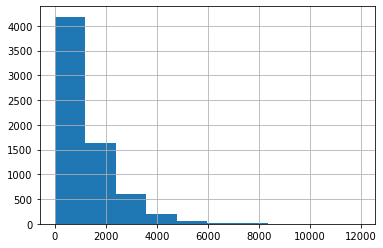

In [138]:
df['clean_text'].str.len().hist();

In [139]:
df = df.loc[df['clean_text'].str.len()<6000]

In [140]:
df.shape

(6682, 6)

In [141]:
df.isnull().sum()

job_title          0
category           0
job_description    0
label              0
clean_desc         0
clean_text         0
dtype: int64

In [142]:
df.head()

,job_title,category,job_description,label,clean_desc,clean_text
0,Enterprise Data Scientist I,Accounting/Finance/Insurance/loans,Read what people are saying about working here. \n\nWe are Farmers!\n\nJoin a team of diverse pr...,0,Join a team of diverse professionals at Farmers to acquire skills on the job and apply your lear...,team job insurance also university named amongst top unit start career today
1,"Data Scientist, Aladdin Wealth Tech, Associate (Modeler)",Accounting/Finance/Insurance/loans,Read what people are saying about working here. \n\nAbout BlackRock\n\nBlackRock helps investors...,0,"Bachelors degree required, Masters degree preferred, in a quantitative discipline (computer scie...",bachelor degree required master degree preferred quantitative discipline computer science mathem...
2,CIB – Fixed Income Research – Machine Learning Data Scientist - Securitized Products – Associate/VP,Accounting/Finance/Insurance/loans,Read what people are saying about working here. \n\nOpportunity\n\nThe opportunity is to join ou...,0,"The opportunity is to join our New York team as an analyst, associate, or VP, with a focus on ap...",new york team analyst associate vp focus application machine learning artificial intelligence fi...
3,"Data Scientist, Licensing Operations",Accounting/Finance/Insurance/loans,Read what people are saying about working here. \n\nAt Spotify our mission is to provide the wor...,0,You have at least 2 years of experience with working with data analysis.Data Visualization exper...,least year experience data analysis data visualization experience e g tableau qliksense coding p...
4,"Data Scientist, Aladdin Wealth Tech, Associate",Accounting/Finance/Insurance/loans,Read what people are saying about working here. \n\nAbout BlackRock\n\nBlackRock helps investors...,0,"Distribution Insights: Use data to understand, measure, and improve client experience on digital...",distribution insight use data understand measure improve client experience digital productsbache...


# Logistic regression

In [143]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

In [144]:
# Define y and X.
X = df['clean_text']
y = df['label']

# Perform train test split so that we can train, score and tune our models' hyperparameters 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [145]:
X_train.shape

(5345,)

In [146]:
X_test.shape

(1337,)

In [147]:
y_train.shape

(5345,)

In [148]:
y_test.shape

(1337,)

In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# Create a pipeline with CountVectorizer and LogisticRegression
pipe1 = Pipeline([
    ('cvec', CountVectorizer(stop_words='english')),
    ('lr', LogisticRegression())
])

# Search over the following values of hyperparameters:
# Maximum number of features fit: 400, 600
# Minimum number of documents needed to include token: 2, 3
# Maximum number of documents needed to include token: 90%, 95%
# Logistic regression penalty: l2 - Ridge
pipe1_params = {
   'cvec__max_features': [6000], 
    'cvec__min_df': [3,5],
    'cvec__max_df': [0.8,0.9],
    'cvec__ngram_range':[(1,1),(1,2)], # Not much impact
    'lr__class_weight':['balanced'],
    'lr__penalty': ['l2'],
    }
    
# Instantiate GridSearchCV
gs_cvec_lr = GridSearchCV(pipe1, # Objects to optimise
                          param_grid = pipe1_params, # Hyperparameters for tuning
                          cv=5) # 5-fold cross validation

In [150]:
# Fit GridSearch to training data
gs_cvec_lr.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec',
                                        CountVectorizer(stop_words='english')),
                                       ('lr', LogisticRegression())]),
             param_grid={'cvec__max_df': [0.8, 0.9],
                         'cvec__max_features': [6000], 'cvec__min_df': [3, 5],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'lr__class_weight': ['balanced'],
                         'lr__penalty': ['l2']})

In [151]:


# Fit GridSearch to training data
preds = gs_cvec_lr.predict(X_test)
# Print results
print('Best parameters: ', gs_cvec_lr.best_params_)
print('Best score: ', gs_cvec_lr.best_score_)
print('Training score:', gs_cvec_lr.score(X_train, y_train))
print('Test score:', gs_cvec_lr.score(X_test, y_test))

Best parameters:  {'cvec__max_df': 0.8, 'cvec__max_features': 6000, 'cvec__min_df': 3, 'cvec__ngram_range': (1, 2), 'lr__class_weight': 'balanced', 'lr__penalty': 'l2'}
Best score:  0.38428437792329284
Training score: 0.7891487371375117
Test score: 0.40089753178758414


In [152]:
pred = gs_cvec_lr.predict(X_test)
print('accuracy %s' % accuracy_score(pred,y_test))
print(classification_report(y_test, pred,target_names=pred_labels))

accuracy 0.40089753178758414
                                    precision    recall  f1-score   support

Accounting/Finance/Insurance/loans       0.40      0.40      0.40       165
                 Computer/Internet       0.57      0.45      0.50       504
          Engineering/Architecture       0.31      0.30      0.31       223
          Manufacturing/Mechanical       0.21      0.25      0.23       153
               Life/Social Science       0.45      0.51      0.47       128
            Admin/HR/Sale/Customer       0.25      0.43      0.32        77
                   Statistics/Math       0.40      0.44      0.42        87

                          accuracy                           0.40      1337
                         macro avg       0.37      0.40      0.38      1337
                      weighted avg       0.42      0.40      0.41      1337



In [153]:
# Predicting on Job_Description
y_pred_test = gs_cvec_lr.predict(X_test)
y_pred_test[:100]
#pred = logreg.predict([df['job_description']])
#print("Predicted : ", pred_labels[int(pred)])

array([6, 1, 4, 6, 6, 3, 2, 0, 6, 1, 0, 1, 6, 5, 5, 1, 1, 2, 6, 0, 3, 0,
       1, 1, 6, 1, 0, 1, 2, 4, 0, 1, 2, 0, 1, 0, 1, 0, 4, 2, 1, 4, 2, 2,
       4, 0, 2, 0, 1, 6, 4, 6, 2, 1, 1, 1, 3, 5, 0, 6, 1, 1, 1, 6, 0, 5,
       5, 2, 4, 1, 0, 4, 3, 5, 5, 1, 4, 2, 3, 1, 0, 1, 0, 2, 4, 1, 3, 4,
       4, 1, 6, 2, 3, 4, 5, 6, 6, 1, 1, 2], dtype=int64)

Logistic Reg & Count Vectorization
              precision    recall  f1-score   support

           0       0.40      0.40      0.40       165
           1       0.57      0.45      0.50       504
           2       0.31      0.30      0.31       223
           3       0.21      0.25      0.23       153
           4       0.45      0.51      0.47       128
           5       0.25      0.43      0.32        77
           6       0.40      0.44      0.42        87

    accuracy                           0.40      1337
   macro avg       0.37      0.40      0.38      1337
weighted avg       0.42      0.40      0.41      1337



<Figure size 1080x864 with 0 Axes>

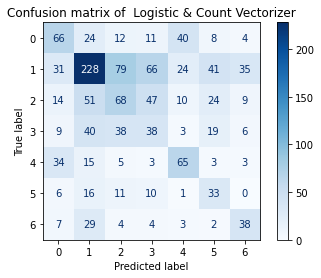

In [154]:
# Confusion matrix of all the four models to look at the number  of  misclassified posts
plt.figure(figsize=(15,12))
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gs_cvec_lr, X_test, y_test, cmap='Blues', values_format='d');
plt.title('Confusion matrix of  Logistic & Count Vectorizer')
print('Logistic Reg & Count Vectorization\n' + classification_report(y_test,y_pred_test))

In [155]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import  GridSearchCV

In [156]:
pipe4 = Pipeline([('tvec', TfidfVectorizer(stop_words='english')),
                  ('nb', MultinomialNB())
               ])
pipe4_params = {
    'tvec__max_features': [500],  
    'tvec__max_df': [.9],
    'tvec__ngram_range':[(1,1)]
    
}

# Instantiate GridSearchCV
gs_tvec_nb = GridSearchCV(pipe4, # Objects to optimise
                          param_grid = pipe4_params, # Hyperparameters for tuning
                          cv=5)

gs_tvec_nb.fit(df['job_description'], df['label'])

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec',
                                        TfidfVectorizer(stop_words='english')),
                                       ('nb', MultinomialNB())]),
             param_grid={'tvec__max_df': [0.9], 'tvec__max_features': [500],
                         'tvec__ngram_range': [(1, 1)]})

In [157]:
# Save the words obtained from Count Vectorizer logistic in a dataframe
coef_df = pd.DataFrame(gs_tvec_nb.best_estimator_.named_steps['tvec'].get_feature_names(), columns=['word'])
# Save the coefficients in the same dataframe
coef_df['coef'] = gs_tvec_nb.best_estimator_.named_steps['nb'].coef_.tolist()[0]
# Find the top 20 predictive words
coef_df.sort_values('coef').head(10)

,word,coef
328,posted,-8.581017
371,reference,-8.459247
211,industries,-7.552583
319,physical,-7.313668
160,experiences,-7.232387
159,experienced,-7.226800
468,type,-7.211199
346,professionals,-7.130929
462,today,-7.114875
490,web,-7.112103


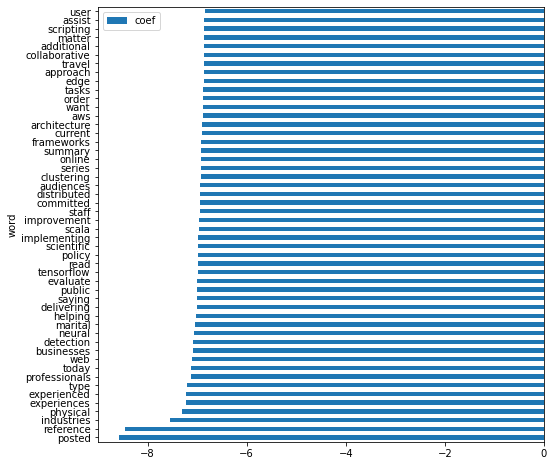

In [158]:
top_coef = coef_df.sort_values('coef').head(50)
top_coef.plot(y='coef', x='word', kind='barh', figsize=(8,8));

## Observation: 
The predictive results based on category(Industry) didn't perform well. Drop the idea of doing classification based on indutry. 
